### ENERGY FORECASTING IN FUEL CELL

##### 1. Problem Statement

to predict the Energy consumption in Fuel Cell

##### 2. Data Collection

Link https://ieee-dataport.org/competitions/energy-forecasting-fuel-cell

2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
import calendar

##### Import the CSV data as panda dataframe

In [9]:
os.chdir('../')

In [10]:

pwd

'/Users/abdulrasheed/Desktop/FuelCellPower'

In [33]:
df = pd.read_csv('data/Fuel Cell.csv')

In [34]:
df.shape

(43797, 2)

##### 2.2 Dataset Information

Datetime

Fuel Cell Power

#### 3. Data Checks to Perform

check Missing values

check duplicates

check data types

check the number of unique value in each column

check statistics of data

check various categories present in categorical column

##### 3.1 Check Missing Values

In [35]:
df.isna().sum()

Datetime            1
Fuel Cell Power     1
dtype: int64

##### 3.2 Check Duplicates values

In [36]:
df.duplicated().sum()

0

##### 3.3 Check Data types

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43797 entries, 0 to 43796
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datetime          43796 non-null  object 
 1   Fuel Cell Power   43796 non-null  float64
dtypes: float64(1), object(1)
memory usage: 684.5+ KB


##### 3.4 Check Statistics of Data

In [38]:
df.describe()

,Fuel Cell Power
count,43796.000000
mean,1631.209152
std,297.607666
min,1014.000000
25%,1420.000000
50%,1596.000000
75%,1798.000000
max,2951.000000


### 4. Spliting Data 

In [39]:
# Convert Datetime column to pandas datetime
df["Datetime"] = pd.to_datetime(df["Datetime"], format="%d-%m-%Y %H:%M", errors="coerce")

# Extract date, month, year, and time
df["Date"] = df["Datetime"].dt.day
df["Month"] = df["Datetime"].dt.month
df["Year"] = df["Datetime"].dt.year
df["Time"] = df["Datetime"].dt.time
df["Power"] = df['Fuel Cell Power ']

# Drop original Datetime column
df = df.drop(columns=['Fuel Cell Power '])



In [40]:
df.drop(columns=['Datetime'], axis =1, inplace=True)

In [41]:
df["Date"] = df["Date"].fillna(31).astype(int)  # Fill missing values with 0 before conversion
df["Month"] = df["Month"].fillna(12).astype(int)
df["Year"] = df["Year"].fillna(2017).astype(int)
df["Power"] = df["Power"].fillna(1614).astype(int)


In [42]:
df["Month"] = df["Month"].map(lambda x: calendar.month_name[x] if pd.notna(x) else None)

In [43]:
df

,Date,Month,Year,Time,Power
0,31,December,2017,01:00:00,1556
1,31,December,2017,02:00:00,1509
2,31,December,2017,03:00:00,1479
3,31,December,2017,04:00:00,1468
4,31,December,2017,05:00:00,1488
...,...,...,...,...,...
43792,1,January,2022,20:00:00,1565
43793,1,January,2022,21:00:00,1551
43794,1,January,2022,22:00:00,1500
43795,1,January,2022,23:00:00,1444


### 5. Exploring Data (Visualisation)

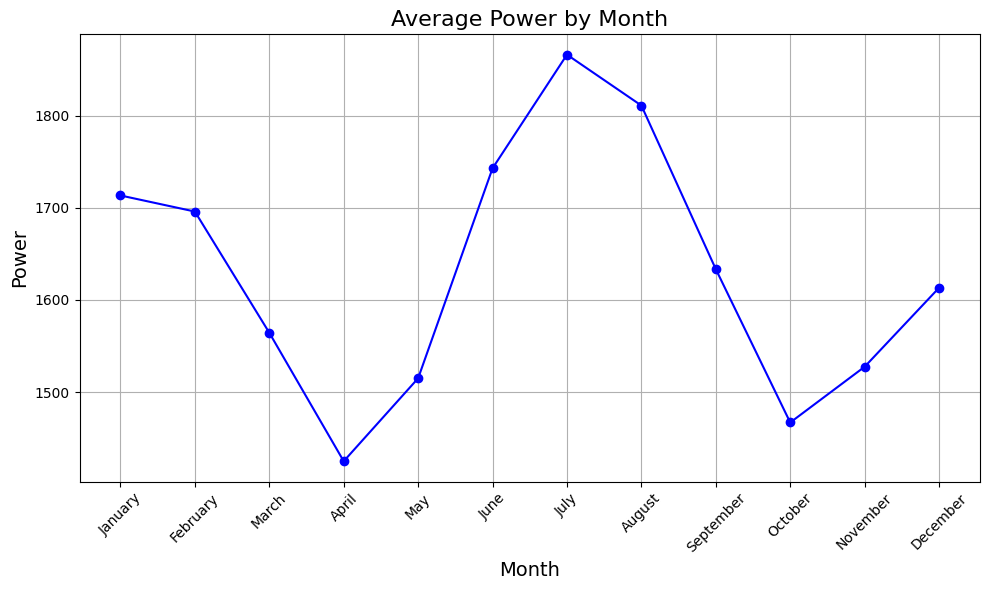

In [47]:
df_grouped = df.groupby("Month", sort=False)["Power"].mean().reset_index()
df_grouped["Month"] = pd.Categorical(df_grouped["Month"], categories=list(calendar.month_name[1:]), ordered=True)
df_grouped = df_grouped.sort_values("Month")
plt.figure(figsize=(10, 6))
plt.plot(df_grouped["Month"], df_grouped["Power"], marker='o', linestyle='-', color='b')
plt.title("Average Power by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Power", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

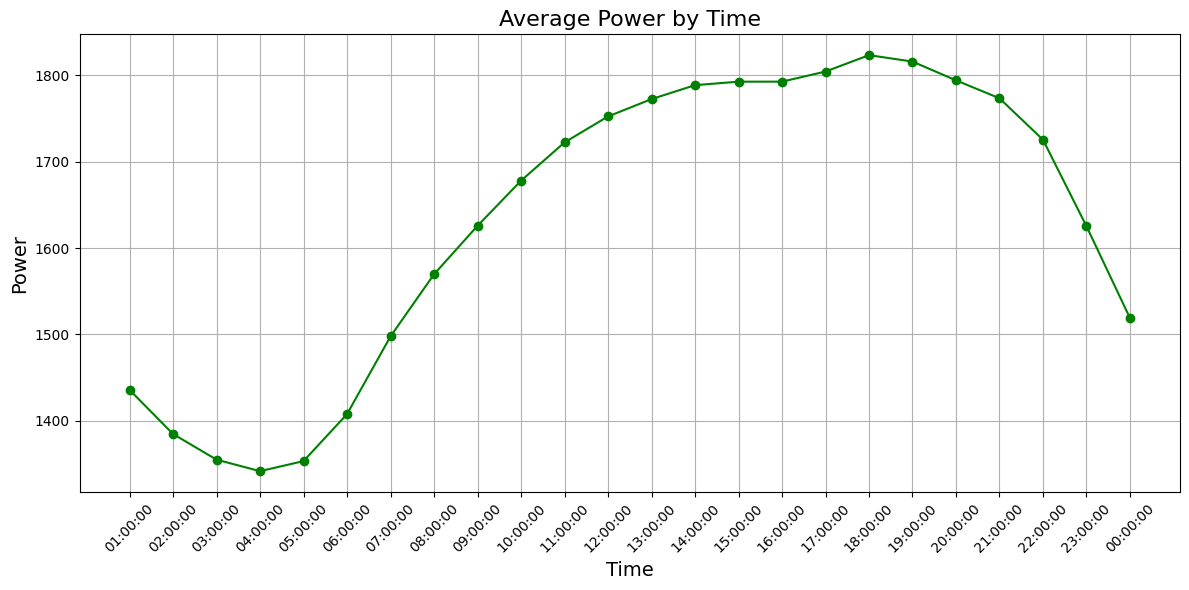

In [49]:
# Group by Time and calculate mean Power
df_grouped = df.groupby("Time", sort=False)["Power"].mean().reset_index()

df_grouped["Time"] = df_grouped["Time"].astype(str)

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(df_grouped["Time"], df_grouped["Power"], marker='o', linestyle='-', color='g')
plt.title("Average Power by Time", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Power", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
# Identify rows with Year == 1900
incorrect_year_indices = df[df["Year"] == 1900].index

# Replace Year == 1900 with the preceding value
for index in incorrect_year_indices:
    if index > 0:  # Ensure it's not the first row
        df.loc[index, "Year"] = df.loc[index - 1, "Year"]

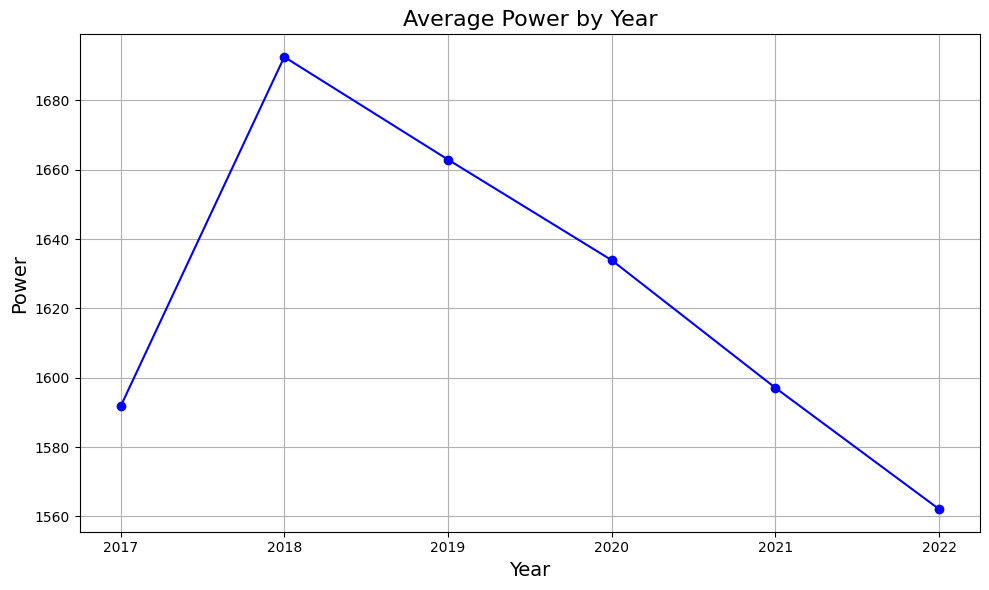

In [57]:
# Group by Year and calculate mean Power
df_grouped = df.groupby("Year", sort=False)["Power"].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_grouped["Year"], df_grouped["Power"], marker='o', linestyle='-', color='b')
plt.title("Average Power by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Power", fontsize=14)
plt.grid(True)
plt.xticks(df_grouped["Year"])
plt.tight_layout()
plt.show()

In [53]:
df[df['Year'] == 1900]

,Date,Month,Year,Time,Power
28486,2,January,1900,00:00:00,1451


In [55]:
df.iloc[28485]

Date            2
Month     January
Year         2020
Time     00:00:00
Power        1528
Name: 28485, dtype: object